In [1]:
import sys
sys.path.append("../../")  # 根据你的 notebook 路径设置

from sl_inference_only_muDMalpha.mock_generator.mock_generator import run_mock_simulation


In [13]:
import sys
from pathlib import Path
import numpy as np
import sys
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm
import sys
sys.path.append("../..")
# Ensure parent directory (containing package) is on path
# sys.path.append(str(Path(__file__).resolve().parents[2]))

from sl_inference_only_muDMalpha.mock_generator.mock_generator import run_mock_simulation
from sl_inference_only_muDMalpha.make_tabulate import tabulate_likelihood_grids
from sl_inference_only_muDMalpha.likelihood import log_likelihood



logalpha = 0.1

df_lens, mock_lens_data, mock_observed_data = run_mock_simulation(100000, logalpha=logalpha, seed=np.random.randint(0, 10000), nbkg=4e-4, if_source=True)


Processing lenses: 100%|██████████| 100000/100000 [00:57<00:00, 1746.32it/s]


In [14]:
# df_lens, mock_lens_data, mock_observed_data = run_mock_simulation(1000, if_source=True, logalpha=0., nbkg=4e-4,seed=np.random.randint(0, 10000))

In [15]:
mock_lens_data

,xA,xB,beta,kappaA,kappaB,gammaA,gammaB,magnificationA,magnificationB,kappa_starA,...,logM_star,logM_star_sps,logM_star_sps_observed,logM_halo,logRe,zl,zs,lens_id,ycaustic_kpc,ycaustic_arcsec
9,7.494339,-3.255365,0.536234,0.332393,0.822670,0.370530,0.863187,3.240480,1.405851,0.151734,...,11.672117,11.572117,11.669812,13.235761,0.980157,0.3,2.0,200,4.155479,0.932913
10,8.021248,-1.741862,0.879762,0.282231,1.526032,0.319651,1.312040,2.420527,0.697094,0.136579,...,11.691216,11.591216,11.598250,13.114389,1.037216,0.3,2.0,254,3.631527,0.815284
40,8.421109,-7.131844,0.122780,0.583838,0.655181,0.357988,0.414844,22.023303,19.012605,0.139026,...,11.754563,11.654563,11.679153,13.806577,1.111665,0.3,2.0,1207,4.025540,0.903741
45,8.039788,-1.707089,0.674645,0.161581,1.359006,0.299804,2.181375,1.630933,0.216627,0.052295,...,11.323765,11.223765,11.316835,12.929378,0.492071,0.3,2.0,1333,6.420346,1.441379
58,5.970677,-3.116610,0.366304,0.305804,0.647623,0.415324,0.888658,3.228771,1.507899,0.129688,...,11.388847,11.288847,11.415902,13.172351,0.688594,0.3,2.0,1841,4.551471,1.021813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,10.984829,-6.818633,0.253896,0.429537,0.635236,0.383571,0.666941,5.602224,3.216909,0.085507,...,11.749282,11.649282,11.600926,13.713397,0.825555,0.3,2.0,98299,8.097146,1.817824
3311,13.661399,-1.929306,0.916134,0.371845,1.975713,0.244771,1.749043,2.987292,0.481577,0.043887,...,11.657273,11.557273,11.599090,13.737371,0.878277,0.3,2.0,98529,5.719636,1.284069
3314,14.534948,-6.569909,0.485740,0.528643,0.867538,0.272826,0.573345,6.762661,3.227199,0.045377,...,11.716952,11.616952,11.723522,13.979121,0.949602,0.3,2.0,98565,5.947704,1.335270
3334,10.078885,-3.121561,0.597029,0.325577,0.996213,0.307279,1.192321,2.773421,0.706228,0.064012,...,11.558346,11.458346,11.506305,13.529473,0.740439,0.3,2.0,99334,6.201856,1.392328


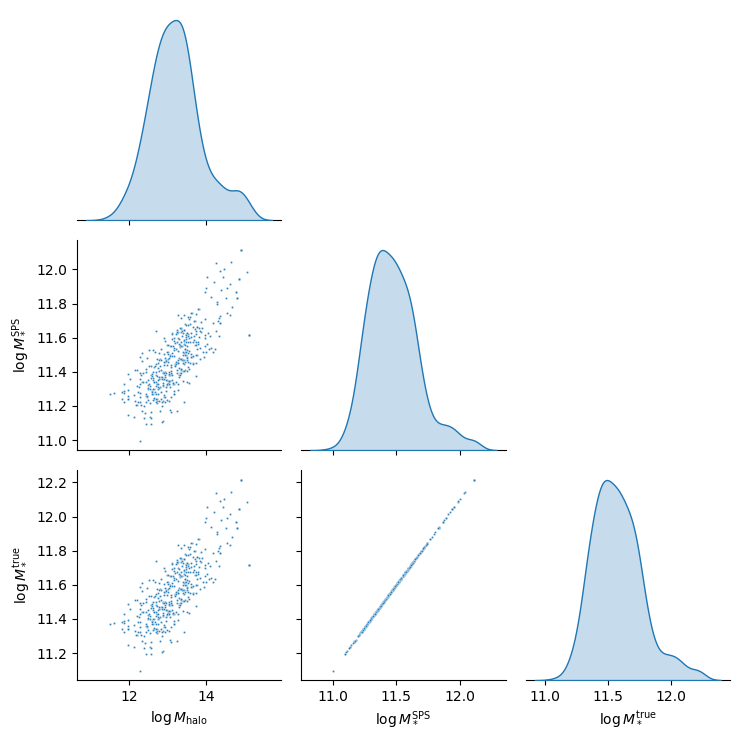

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# === 读取 mock lens 数据 ===
# mock_lens_data 
# === 提取感兴趣的列 ===
mock_data = mock_lens_data[["logM_halo", "logM_star_sps","logM_star"]]

# === 可选：设定标签（LaTeX 风格）===
mock_data.columns = [
    r"$\log M_{\rm halo}$",
    r"$\log M_*^{\rm SPS}$",
    r"$\log M_*^{\rm true}$",
    # r"$\log \alpha_{\rm SPS}$"
]

# === 绘图 ===
sns.pairplot(
    mock_data,
    diag_kind="kde",
    markers=".",
    plot_kws={"alpha": 0.9, "s": 10},
    corner=True  # 去掉右上角镜像图
)

plt.tight_layout()
plt.show()


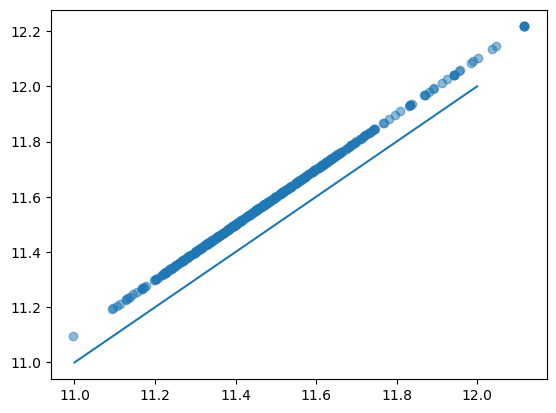

In [17]:
plt.scatter(mock_lens_data["logM_star_sps"], mock_lens_data["logM_star"], alpha=0.5)
plt.plot([11,12],[11,12])

In [6]:
samples = generate_samples(
    model="deVauc",
    n_samples=10000,)

NameError: name 'generate_samples' is not defined

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# === 生成模拟数据 ===


logM_star_sps_observed = samples['logM_star_sps']
logMhalo_sps_observed = samples['logMh']

# ========== Step 1: 拟合 logMh 模型 (假设 xi = 0) ==========
x = logM_star_sps_observed - 11.4
y = logMhalo_sps_observed

reg_Mh = LinearRegression().fit(x.reshape(-1, 1), y)

mu_DM = reg_Mh.intercept_
beta_DM = reg_Mh.coef_[0]

residuals = y - reg_Mh.predict(x.reshape(-1, 1))
sigma_DM = np.std(residuals)

# ========== 输出结果 ==========
print(f"mu_DM    = {mu_DM:.4f}")
print(f"beta_DM  = {beta_DM:.4f}")
print(f"sigma_DM = {sigma_DM:.4f}")

# ========== 可选：保存结果 ==========
fit_result = {
    "mu_DM": mu_DM,
    "beta_DM": beta_DM,
    "sigma_DM": sigma_DM
}


NameError: name 'samples' is not defined

In [21]:
# df_lens, mock_lens_data, mock_observed_data = run_mock_simulation(10000, if_source=True)
from sl_inference_only_muDMalpha.mock_generator.mass_sampler import generate_samples
samples = generate_samples(
    model="deVauc",
    n_samples=10000,)

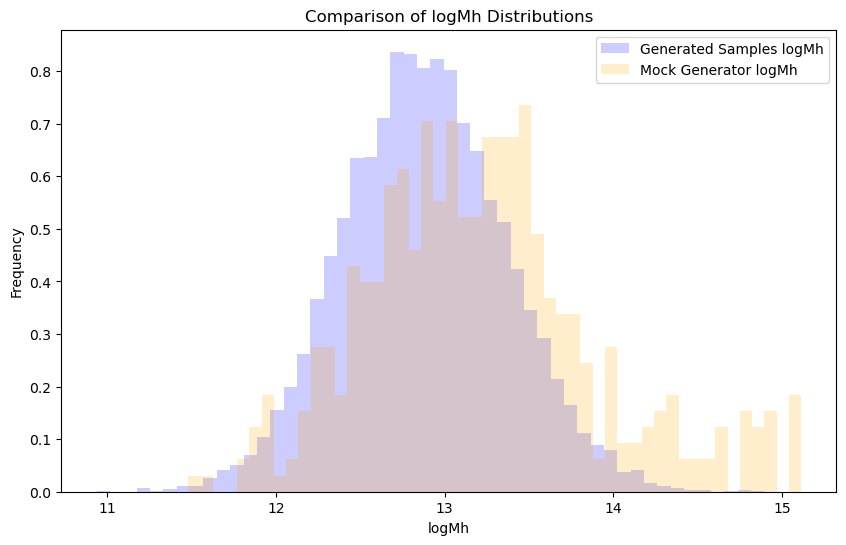

In [23]:
# 对比generated samples和mock generator 的logMh，logMstarsps
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(samples['logMh'], bins=50, alpha=0.2, label='Generated Samples logMh', color='blue',density=True)
plt.hist(mock_lens_data['logM_halo'], bins=50, alpha=0.2, label='Mock Generator logMh', color='orange',density=True)
plt.xlabel('logMh')
plt.ylabel('Frequency')
plt.title('Comparison of logMh Distributions')
plt.legend()

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# === 生成模拟数据 ===
# mock_lens_data, mock_observed_data = run_mock_simulation(10000, 
logM_star_sps_observed = mock_lens_data['logM_star_sps'].values
logMhalo_sps_observed = mock_lens_data['logM_halo'].values

# ========== Step 1: 拟合 logMh 模型 (假设 xi = 0) ==========
x = logM_star_sps_observed - 11.4
y = logMhalo_sps_observed

reg_Mh = LinearRegression().fit(x.reshape(-1, 1), y)

mu_DM = reg_Mh.intercept_
beta_DM = reg_Mh.coef_[0]

residuals = y - reg_Mh.predict(x.reshape(-1, 1))
sigma_DM = np.std(residuals)

# ========== 输出结果 ==========
print(f"mu_DM    = {mu_DM:.4f}")
print(f"beta_DM  = {beta_DM:.4f}")
print(f"sigma_DM = {sigma_DM:.4f}")

# ========== 可选：保存结果 ==========
fit_result = {
    "mu_DM": mu_DM,
    "beta_DM": beta_DM,
    "sigma_DM": sigma_DM
}


mu_DM    = 13.0001
beta_DM  = 2.7926
sigma_DM = 0.4141


In [21]:
from scipy.optimize import minimize
from scipy.stats import norm

x = logM_star_sps_observed
y = logMhalo_sps_observed

def neg_loglike(theta):
    mu_h0, beta_h, log_sigma = theta
    sigma = np.exp(log_sigma)
    mu = mu_h0 + beta_h * (x - 11.4)
    return -np.sum(norm.logpdf(y, loc=mu, scale=sigma))

theta0 = [12.5, 1.5, np.log(0.3)]
result = minimize(neg_loglike, theta0)

mu_h0_fit, beta_h_fit, log_sigma_fit = result.x
sigma_fit = np.exp(log_sigma_fit)

print(f"[MLE Fit]")
print(f"mu_h0  = {mu_h0_fit:.4f}")
print(f"beta_h = {beta_h_fit:.4f}")
print(f"sigma  = {sigma_fit:.4f}")


[MLE Fit]
mu_h0  = 12.8910
beta_h = 1.4608
sigma  = 0.3220


In [ ]:
{'mu_star': 11.252, 'sigma_star': 0.202, 'log_s_star': 0.17, 'mu_R0': 0.774, 'beta_R': 0.977, 'sigma_R': 0.112, 'mu_h0': 12.91, 'beta_h': 2.04, 'xi_h': 0.0, 'sigma_h': 0.37}

In [20]:
from sl_inference_restart.mock_generator.mass_sampler import MODEL_PARAMS
print(MODEL_PARAMS["deVauc"]["mu_h0"], MODEL_PARAMS["deVauc"]["beta_h"], MODEL_PARAMS["deVauc"]["sigma_h"])

12.91 2.04 0.37


In [3]:
import pandas as pd
mock_lens_data = pd.df = pd.read_csv("../../mock_lens_data.csv")

Processing lenses: 100%|██████████| 10000/10000 [00:33<00:00, 298.63it/s]


In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

mock_lens_data, mock_observed_data = run_mock_simulation(1000)
# 假设你已加载 mock_lens_data
logM_star_sps_observed = mock_lens_data['logM_star_sps'].values
logRe_observed = mock_lens_data['logRe'].values
logMhalo_sps_observed = mock_lens_data['logM_halo'].values


# ========== Step 1: 拟合 logRe_model ==========
x1 = logM_star_sps_observed - 11.4
y1 = logRe_observed
reg_Re = LinearRegression().fit(x1.reshape(-1, 1), y1)

a = reg_Re.intercept_
b = reg_Re.coef_[0]
logRe_model = a + b * x1
# Step 2: 拟合 logMh 模型（无 logRe 项）
X = (logM_star_sps_observed - 11.4).reshape(-1, 1)
y = logMhalo_sps_observed

reg_Mh = LinearRegression().fit(X, y)
mu_DM = reg_Mh.intercept_
beta_DM = reg_Mh.coef_[0]

# 残差标准差
residuals = y - reg_Mh.predict(X)
sigma_DM = np.std(residuals)

# 输出
print(f"mu_DM    = {mu_DM:.4f}")
print(f"beta_DM  = {beta_DM:.4f}")
print(f"sigma_DM = {sigma_DM:.4f}")

# 保存结果
fit_result = {
    "mu_DM": mu_DM,
    "beta_DM": beta_DM,
    "sigma_DM": sigma_DM,
    "a_logRe_model": a,
    "b_logRe_model": b
}


Processing lenses:   0%|          | 0/1000 [00:00<?, ?it/s]

Processing lenses: 100%|██████████| 1000/1000 [00:03<00:00, 287.95it/s]

mu_DM    = 12.9081
beta_DM  = 1.6582
sigma_DM = 0.3690


In [16]:
from sl_inference_restart.mock_generator.mass_sampler import MODEL_PARAMS
print(MODEL_PARAMS["deVauc"])

{'mu_star': 11.252, 'sigma_star': 0.202, 'log_s_star': 0.17, 'mu_R0': 0.774, 'beta_R': 0.977, 'sigma_R': 0.112, 'mu_h0': 12.91, 'beta_h': 2.04, 'xi_h': 0.0, 'sigma_h': 0.37}


In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


# df_lens, mock_lens_data, mock_observed_data = run_mock_simulation(10000, if_source=True)

# 假设你已经有 mock_lens_data
logM_star_sps_observed = mock_lens_data['logM_star_sps'].values
logMhalo_sps_observed = mock_lens_data['logM_halo'].values

# ===== 固定参数 =====
beta_DM_fixed = 2.04
sigma_DM_fixed = 0.37

# ===== Step: 直接计算 mu_DM =====
# 模型: logM_halo = mu_DM + beta_DM_fixed * (logM_star_sps - 11.4) + 误差
X_centered = logM_star_sps_observed - 11.4
y = logMhalo_sps_observed

# 固定 beta_DM 时，mu_DM 可以通过均值计算得到：
mu_DM = np.mean(y - beta_DM_fixed * X_centered)

# ===== 验证残差方差 =====
residuals = y - (mu_DM + beta_DM_fixed * X_centered)
sigma_DM_empirical = np.std(residuals)

print(f"mu_DM                = {mu_DM:.4f}")
print(f"beta_DM (fixed)      = {beta_DM_fixed:.4f}")
print(f"sigma_DM (fixed)     = {sigma_DM_fixed:.4f}")
print(f"sigma_DM (from data) = {sigma_DM_empirical:.4f}")


mu_DM                = 13.1075
beta_DM (fixed)      = 2.0400
sigma_DM (fixed)     = 0.3700
sigma_DM (from data) = 0.3027


In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


# df_lens, mock_lens_data, mock_observed_data = run_mock_simulation(1000, if_source=True)

# 假设你已经有 mock_lens_data
logM_star_sps_observed = df_lens['logM_star_sps'].values
logMhalo_sps_observed = df_lens['logM_halo'].values

# ===== 固定参数 =====
beta_DM_fixed = 2.04
sigma_DM_fixed = 0.37

# ===== Step: 直接计算 mu_DM =====
# 模型: logM_halo = mu_DM + beta_DM_fixed * (logM_star_sps - 11.4) + 误差
X_centered = logM_star_sps_observed - 11.4
y = logMhalo_sps_observed

# 固定 beta_DM 时，mu_DM 可以通过均值计算得到：
mu_DM = np.mean(y - beta_DM_fixed * X_centered)

# ===== 验证残差方差 =====
residuals = y - (mu_DM + beta_DM_fixed * X_centered)
sigma_DM_empirical = np.std(residuals)

print(f"mu_DM                = {mu_DM:.4f}")
print(f"beta_DM (fixed)      = {beta_DM_fixed:.4f}")
print(f"sigma_DM (fixed)     = {sigma_DM_fixed:.4f}")
print(f"sigma_DM (from data) = {sigma_DM_empirical:.4f}")


mu_DM                = 12.9102
beta_DM (fixed)      = 2.0400
sigma_DM (fixed)     = 0.3700
sigma_DM (from data) = 0.3707


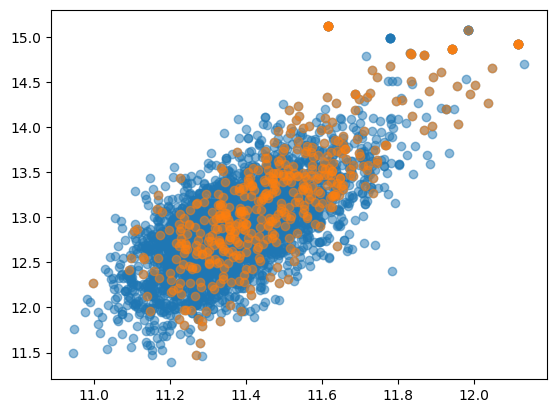

In [25]:
plt.scatter(df_lens['logM_star_sps'], df_lens['logM_halo'], alpha=0.5)
plt.scatter(mock_lens_data['logM_star_sps'], mock_lens_data['logM_halo'], alpha=0.5)

In [ ]:
class LensModel:
    """
    LensModel 类：
    所有内部计算单位：
    - M_star, M_halo：Msun（太阳质量）
    - Re, rs, x, R：kpc
    - Sigma, s_cr：Msun / kpc^2
    - alpha(x)：kpc（也提供 arcsec 接口）
    - theta：arcsec（角度单位）
    - kappa, gamma：无量纲
    """
    # use : model = LensModel(logM_star=logM_star, 
    #                         logM_halo=logM_halo, logRe=logRe, 
    #                         zl=zl, zs=zs)

    def __init__(self, logM_star, logM_halo, logRe, zl, zs):
        self.zl, self.zs = zl, zs
        self.logM_star = logM_star  # [Msun]

In [1]:
import sys
sys.path.append("../../")  # 根据你的 notebook 路径设置

from sl_inference_only_muDMalpha.mock_generator.lens_model import LensModel
from sl_inference_only_muDMalpha.mock_generator.lens_solver import solve_single_lens, solve_lens_parameters_from_obs_yc

In [2]:
model = LensModel(logM_star=11.5, logM_halo=13.0, logRe=0.8, zl=0.3, zs=2.0)
xA, xB = solve_single_lens(model,0.5)
Mstar, beta,yc = solve_lens_parameters_from_obs_yc(xA, xB, 0.8, 13, 0.3, 2)
print(Mstar, beta, yc)

11.5 0.5 4.394416219796149


In [11]:

def solve_lens_parameters_from_obs_yc(xA_obs, xB_obs, logRe_obs, logM_halo, zl, zs):

SyntaxError: incomplete input (117741844.py, line 1)

In [ ]:
def solve_lens_parameters_from_obs(xA_obs, xB_obs, logRe_obs, logM_halo, zl, zs, yc=False):

In [33]:
mock_lens_data

,xA,xB,beta,kappaA,kappaB,gammaA,gammaB,magnificationA,magnificationB,kappa_starA,...,maximum_magnitude,beta_unit,logalpha_sps,logM_star,logM_star_sps,logM_star_sps_observed,logM_halo,logRe,zl,zs
7,18.780051,-9.580837,0.454169,0.280267,0.719988,0.438086,0.832111,3.066540,1.628723,0.014474,...,26.5,0.454169,0.1,11.582781,11.482781,11.608804,12.855232,0.712156,0.3,2.0
11,17.133171,-15.933159,0.058878,0.412945,0.458340,0.547472,0.584238,22.264408,20.863705,0.013581,...,26.5,0.058878,0.1,11.409080,11.309080,11.240736,12.991012,0.790560,0.3,2.0
16,20.785996,-4.275511,0.965047,0.239130,1.748182,0.364546,1.178681,2.241998,1.205759,0.021927,...,26.5,0.965047,0.1,11.707693,11.607693,11.411012,12.829044,1.132424,0.3,2.0
22,15.948996,-13.042733,0.157744,0.382719,0.508058,0.515018,0.617007,8.635731,7.210831,0.021366,...,26.5,0.157744,0.1,11.518218,11.418218,11.332413,12.892444,0.818155,0.3,2.0
23,24.232042,-8.573007,0.755725,0.247113,1.053214,0.397689,0.950804,2.446870,1.109690,0.013692,...,26.5,0.755725,0.1,11.659497,11.559497,11.576793,12.978703,1.085982,0.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,14.284784,-7.718625,0.477801,0.333057,0.739863,0.425746,0.706546,3.794226,2.317436,0.019555,...,26.5,0.477801,0.1,11.378321,11.278321,11.074663,12.747949,0.785255,0.3,2.0
984,15.770236,-14.038061,0.090441,0.404250,0.476178,0.534029,0.593173,14.339322,12.910420,0.015534,...,26.5,0.090441,0.1,11.422911,11.322911,11.194045,12.920710,0.700975,0.3,2.0
991,7.306749,-4.374070,0.295028,0.293849,0.586505,0.465654,0.815263,3.548358,2.025729,0.083857,...,26.5,0.295028,0.1,11.390211,11.290211,11.375150,12.141871,0.629152,0.3,2.0
992,23.696794,-9.721877,0.626060,0.253919,0.892574,0.411701,0.922492,2.583037,1.191302,0.005898,...,26.5,0.626060,0.1,11.471189,11.371189,11.173847,12.991688,0.708601,0.3,2.0


In [18]:
a,b

(0.7899261717705088, 0.9278411771948047)

In [19]:
from sklearn.metrics import r2_score

y_true = logMhalo_sps_observed
y_pred = reg_Mh.predict(X)
r2 = r2_score(y_true, y_pred)
print(f"R^2 score = {r2:.4f}")


R^2 score = 0.2821


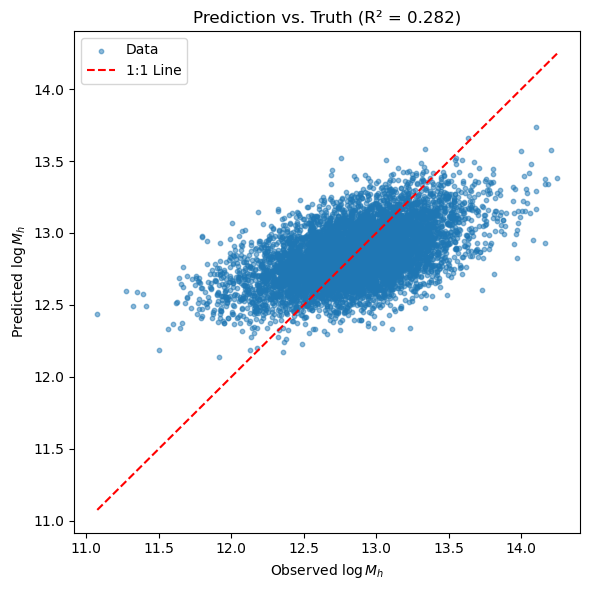

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.5, s=10, label='Data')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='1:1 Line')
plt.xlabel('Observed $\\log M_h$')
plt.ylabel('Predicted $\\log M_h$')
plt.title(f'Prediction vs. Truth (R² = {r2:.3f})')
plt.legend()
plt.tight_layout()
plt.show()


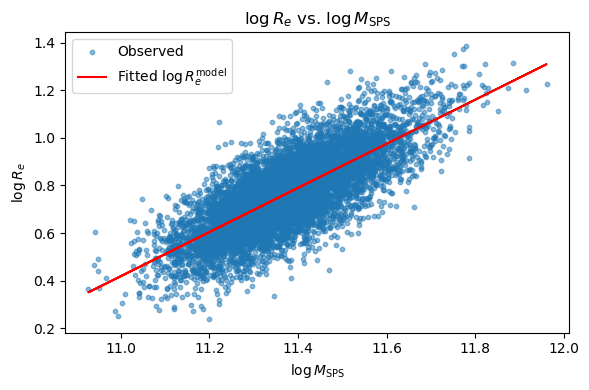

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(logM_star_sps_observed, logRe_observed, s=10, alpha=0.5, label='Observed')
plt.plot(logM_star_sps_observed, logRe_model, 'r-', label='Fitted $\\log R_e^{\\rm model}$')
plt.xlabel('$\\log M_{\\rm SPS}$')
plt.ylabel('$\\log R_e$')
plt.title('$\\log R_e$ vs. $\\log M_{\\rm SPS}$')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = logM_star_sps_observed - 11.4
y = logMhalo_sps_observed

reg_simple = LinearRegression().fit(x.reshape(-1, 1), y)
r2_simple = r2_score(y, reg_simple.predict(x.reshape(-1, 1)))
print(f"R² (only logM_*) = {r2_simple:.4f}")


R² (only logM_*) = 0.2743


mu_DM    = 12.8855
beta_DM  = 1.4670
sigma_DM = 0.3232
R²       = 0.2743


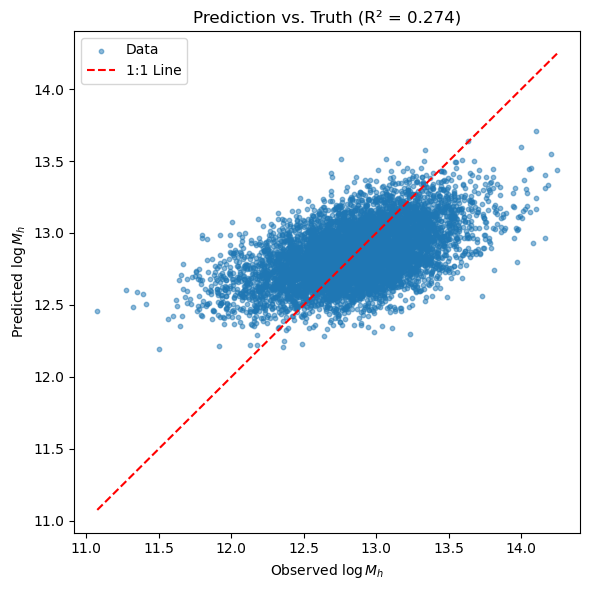

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

logM_star_sps_observed = mock_lens_data['logM_star_sps'].values
logRe_observed = mock_lens_data['logRe'].values
logMhalo_sps_observed = mock_lens_data['logM_halo'].values

# 构造输入特征 (logM_sps - 11.4)
X = (logM_star_sps_observed - 11.4).reshape(-1, 1)
y = logMhalo_sps_observed

# 拟合线性模型
reg = LinearRegression().fit(X, y)
mu_DM = reg.intercept_
beta_DM = reg.coef_[0]
y_pred = reg.predict(X)
sigma_DM = np.std(y - y_pred)
r2 = r2_score(y, y_pred)

# 打印结果
print(f"mu_DM    = {mu_DM:.4f}")
print(f"beta_DM  = {beta_DM:.4f}")
print(f"sigma_DM = {sigma_DM:.4f}")
print(f"R²       = {r2:.4f}")

# 可视化：预测 vs 真实
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.5, s=10, label='Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='1:1 Line')
plt.xlabel('Observed $\\log M_h$')
plt.ylabel('Predicted $\\log M_h$')
plt.title(f'Prediction vs. Truth (R² = {r2:.3f})')
plt.legend()
plt.tight_layout()
plt.show()


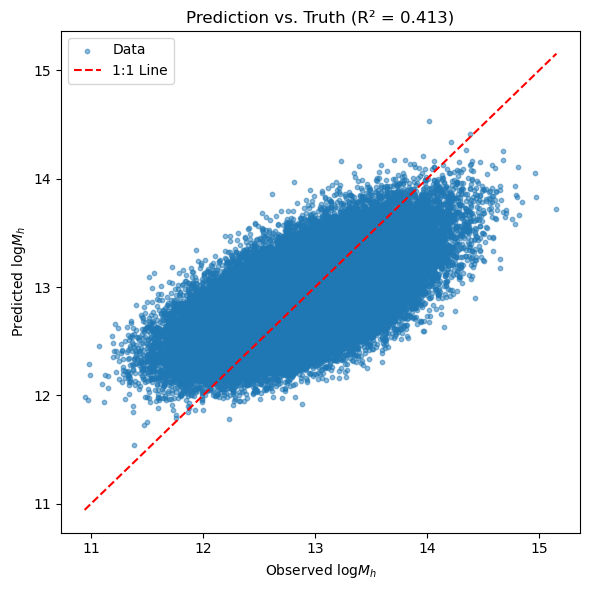

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../..")
from sl_inference_only_muDMalpha.mock_generator.mass_sampler import generate_samples, MODEL_PARAMS

# ====== 手动降低 logMh 的散度（噪声） ======
# MODEL_PARAMS['deVauc']['sigma_h'] = 0.  # 原为 0.37，改为更小值以减小噪声

# ====== 生成模拟样本 ======
n_samples = 100000
data = generate_samples(n_samples, model='deVauc', random_state=42)

logM_star_sps = data['logM_star_sps']
logMh = data['logMh']


# model_name = 'deVauc'
# params = MODEL_PARAMS[model_name]
# samples = generate_samples(100000, model=model_name)

# logM_star_sps = samples['logM_star_sps']
# logRe = samples['logRe']
# logMh = samples['logMh']
# ====== 简单拟合并绘图 ======
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# X = logM_star_sps.reshape(-1, 1)
X = (logM_star_sps - 11.4).reshape(-1, 1)
y = logMh

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# ====== 绘图展示结果 ======
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, s=10, alpha=0.5, label="Data")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='1:1 Line')
plt.xlabel("Observed log$M_h$")
plt.ylabel("Predicted log$M_h$")
plt.title(f"Prediction vs. Truth (R² = {r2:.3f})")
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
model_name = 'deVauc'
params = MODEL_PARAMS[model_name]
samples = generate_samples(100000, model=model_name)

logM_star_sps = samples['logM_star_sps']
logRe = samples['logRe']
logMh = samples['logMh']

mu_DM    = 12.9098
beta_DM  = 2.0314
sigma_DM = 0.3694
R²       = 0.4098


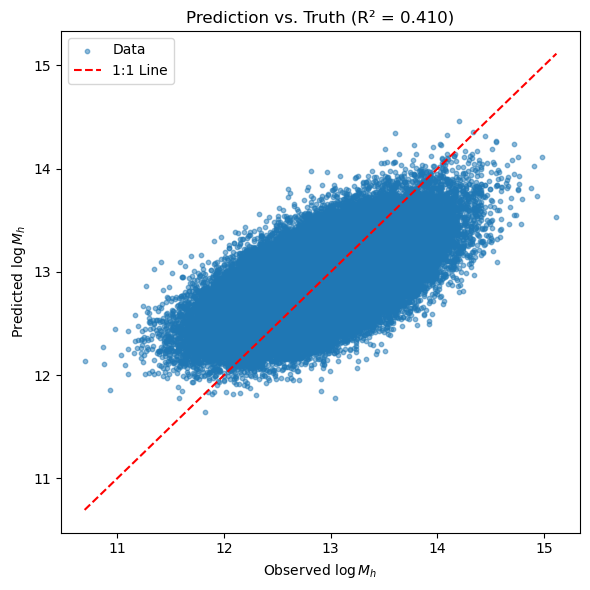

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

logM_star_sps_observed = logM_star_sps
logMhalo_sps_observed = logMh

# 构造输入特征 (logM_sps - 11.4)
X = (logM_star_sps_observed - 11.4).reshape(-1, 1)
y = logMhalo_sps_observed

# 拟合线性模型
reg = LinearRegression().fit(X, y)
mu_DM = reg.intercept_
beta_DM = reg.coef_[0]
y_pred = reg.predict(X)
sigma_DM = np.std(y - y_pred)
r2 = r2_score(y, y_pred)

# 打印结果
print(f"mu_DM    = {mu_DM:.4f}")
print(f"beta_DM  = {beta_DM:.4f}")
print(f"sigma_DM = {sigma_DM:.4f}")
print(f"R²       = {r2:.4f}")

# 可视化：预测 vs 真实
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.5, s=10, label='Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='1:1 Line')
plt.xlabel('Observed $\\log M_h$')
plt.ylabel('Predicted $\\log M_h$')
plt.title(f'Prediction vs. Truth (R² = {r2:.3f})')
plt.legend()
plt.tight_layout()
plt.show()


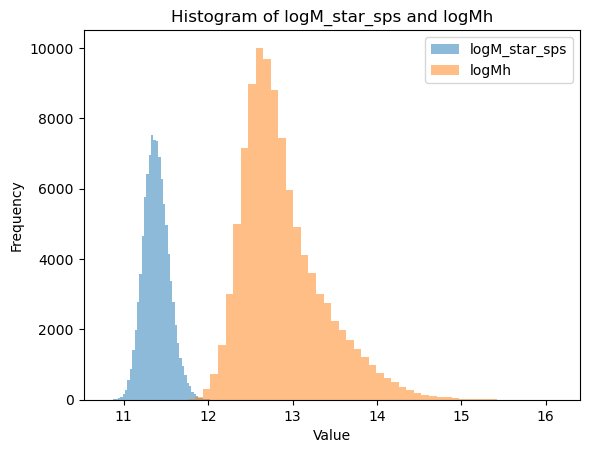

In [13]:
n_samples = 100000
data = generate_samples(n_samples, model='deVauc', random_state=42)

logM_star_sps = data['logM_star_sps']
logMh = data['logMh']


plt.hist(logM_star_sps, bins=50, alpha=0.5, label='logM_star_sps')
plt.hist(logMh, bins=50, alpha=0.5, label='logMh')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of logM_star_sps and logMh')
plt.legend()

Text(0.5, 0, 'Value')

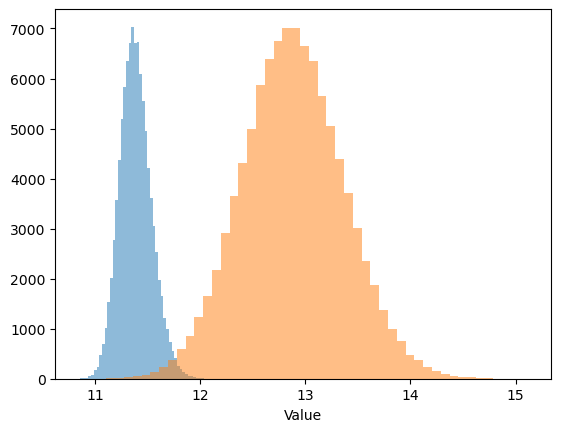

In [11]:
model_name = 'deVauc'
params = MODEL_PARAMS[model_name]
samples = generate_samples(100000, model=model_name)

logM_star_sps = samples['logM_star_sps']
logRe = samples['logRe']
logMh = samples['logMh']

plt.hist(logM_star_sps, bins=50, alpha=0.5, label='logM_star_sps')
# plt.hist(logRe, bins=50, alpha=0.5, label='logRe')
plt.hist(logMh, bins=50, alpha=0.5, label='logMh')
plt.xlabel('Value')

Text(0, 0.5, 'Frequency')

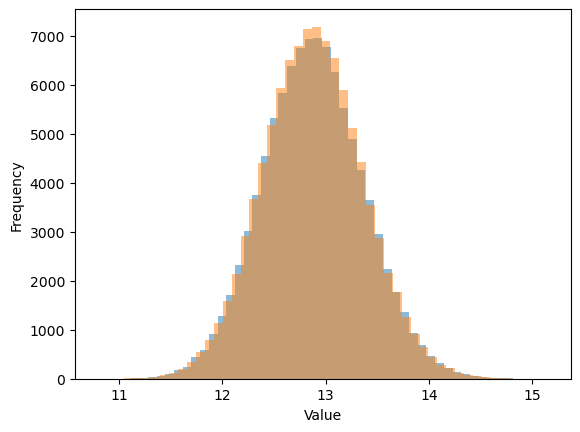

In [2]:
from mass_sampler import generate_samples, MODEL_PARAMS
import matplotlib.pyplot as plt
n_samples = 100000
data1 = generate_samples(n_samples, model='deVauc', random_state=42)
logMh1 = data1['logMh']

data2 = generate_samples(n_samples, model='deVauc', random_state=None)
logMh2 = data2['logMh']

plt.hist(logMh1, bins=50, alpha=0.5, label='logMh1')
plt.hist(logMh2, bins=50, alpha=0.5, label='logMh2')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [18]:
from scipy.stats import ks_2samp
statistic, pvalue = ks_2samp(logMh1, logMh2)
print(f"KS statistic = {statistic:.5e}, p = {pvalue:.3g}")


KS statistic = 9.43216e-02, p = 0


你的 `generate_samples` 中虽然只传入了一个 `random_state` 参数，但它会**多次传递给三个不同的 `rvs(...)` 调用**（即三个子采样器），这会导致：

---

### ✅ 当前代码的结构

```python
rvs(size=n, random_state=random_state)
```

在三个地方依次使用：

* 生成 `logM_star_sps`
* 然后用它生成 `logRe`
* 再用两者生成 `logMh`

---

### 🚨 原因：传递相同 seed 到多个采样器 = 每次采样都从同一状态开始

`scipy.stats` 中的 `rvs(..., random_state=...)` 是**可重入的**，即：

> 每次你调用 `rvs(..., random_state=42)`，它**从头重新启动该 seed 所决定的随机序列**！

---

### 🔁 具体后果是：

你写的代码就像在执行：

```python
rng = np.random.default_rng(42)

logM_star_sps = skewnorm(...).rvs(..., random_state=rng)
logRe = norm(...).rvs(..., random_state=rng)      # 重复使用 rng
logMh = norm(...).rvs(..., random_state=rng)      # 重复使用 rng
```

**但实际上你是这样做的：**

```python
logM_star_sps = skewnorm(...).rvs(..., random_state=42)
logRe = norm(...).rvs(..., random_state=42)
logMh = norm(...).rvs(..., random_state=42)
```

即**每次都重新创建一个随机状态，生成结果总是相同**，就像把骰子永远停在第一次一样。

---

### ✅ 正确写法：共享一个 RNG 对象

你可以改写为：

```python
def generate_samples(n_samples, model='deVauc', random_state=None):
    rng = np.random.default_rng(random_state)

    logM_star_sps = mstar_gene(n_samples, model=model, random_state=rng)
    logRe = logRe_given_logM(logM_star_sps, model=model, random_state=rng)
    logMh = logMh_given_logM_logRe(logM_star_sps, logRe, model=model, random_state=rng)
```

然后三个采样函数也都接受 `Generator` 类型的 `random_state`，例如：

```python
def mstar_gene(n, model='deVauc', random_state=None):
    ...
    return dist.rvs(size=n, random_state=random_state)  # 支持 Generator 实例
```

---

### ✅ 总结

| 问题点           | 影响                  |
| ------------- | ------------------- |
| 多次传入相同整数 seed | 每次采样结果都一样（不是独立）     |
| 导致所有链式变量都高度相关 | 导致 `logMh` 的分布收缩、偏斜 |
| KS 检验明显区分     | 实际上采样“退化”了          |

---

是否需要我帮你一键改写整个模块，使它支持统一的 `np.random.Generator`？这能从根本解决问题，并保持科学性与重现性。
